In [ ]:
# grupo IACE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
dfs = pd.read_excel('barrettII_eyes_clustering.xlsx', sheet_name='Sheet1')

In [3]:
dfs

,ID,AL,ACD,WTW,K1,K2,Correto
0,0,23.79,3.32,12.0,43.60,44.29,S
1,1,24.60,3.39,12.3,42.03,43.95,S
2,2,24.59,3.51,12.3,42.83,43.05,S
3,3,24.04,2.96,12.0,42.35,42.83,S
4,4,24.80,2.44,12.2,41.01,41.67,S
...,...,...,...,...,...,...,...
1523,1523,23.32,3.29,12.5,43.16,43.95,S
1524,1524,23.59,3.19,13.0,42.72,43.60,N
1525,1525,26.18,3.83,12.1,43.44,44.18,S
1526,1526,24.09,2.77,12.6,42.83,43.72,S


In [4]:
dfs.isnull().sum()

ID         0
AL         0
ACD        0
WTW        0
K1         0
K2         0
Correto    0
dtype: int64

In [5]:
X2 = dfs[['AL','ACD', 'WTW', 'K1', 'K2']].iloc[:][:].values

inertia = []

for n in range(1, 11):
    algorithm = (KMeans(n_clusters=n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

C:\Users\cadu-\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


(Text(0.5, 0, 'Número de Clusters'),
 Text(0, 0.5, 'Soma das distâncias Q intra Clusters'))

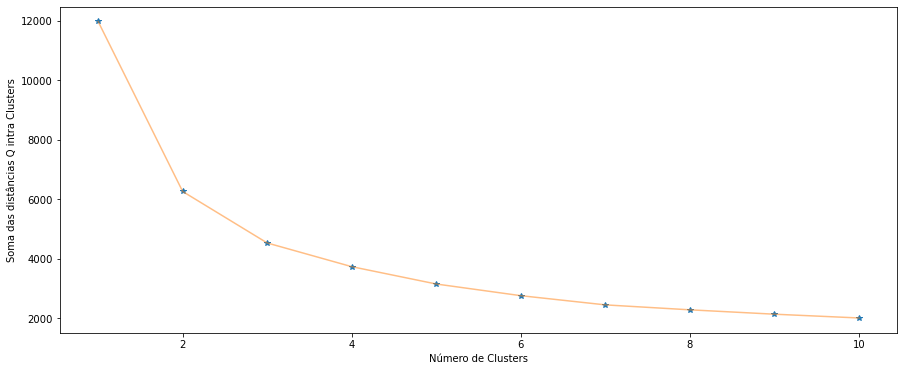

In [6]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, '*')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Número de Clusters'), plt.ylabel('Soma das distâncias Q intra Clusters')

In [7]:
clustering_kmeans = KMeans(n_clusters=3)
dfs['clusters'] = clustering_kmeans.fit_predict(X2)

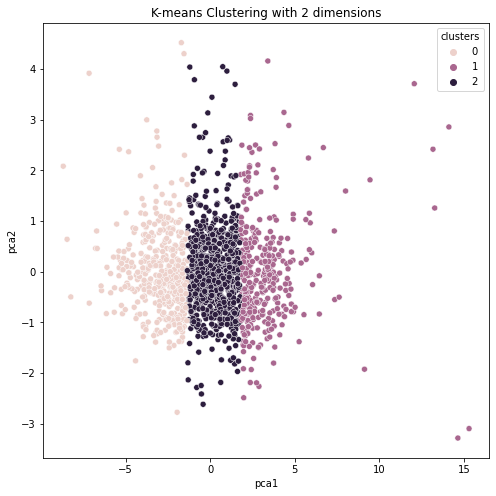

In [8]:
# https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns

reduced_data = PCA(n_components=2).fit_transform(X2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

plt.figure(figsize=(8, 8))
sns.scatterplot(x="pca1", y="pca2", hue=dfs['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()



In [9]:
dfs

,ID,AL,ACD,WTW,K1,K2,Correto,clusters
0,0,23.79,3.32,12.0,43.60,44.29,S,2
1,1,24.60,3.39,12.3,42.03,43.95,S,2
2,2,24.59,3.51,12.3,42.83,43.05,S,2
3,3,24.04,2.96,12.0,42.35,42.83,S,1
4,4,24.80,2.44,12.2,41.01,41.67,S,1
...,...,...,...,...,...,...,...,...
1523,1523,23.32,3.29,12.5,43.16,43.95,S,2
1524,1524,23.59,3.19,13.0,42.72,43.60,N,2
1525,1525,26.18,3.83,12.1,43.44,44.18,S,2
1526,1526,24.09,2.77,12.6,42.83,43.72,S,2


In [10]:
columns = ['AL','ACD', 'WTW', 'K1', 'K2']

group_zero = dfs[dfs['clusters'] == 0]
group_one = dfs[dfs['clusters'] == 1]
group_two = dfs[dfs['clusters'] == 2]

In [11]:
group_zero.describe()

,ID,AL,ACD,WTW,K1,K2,clusters
count,438.000000,438.000000,438.00000,438.000000,438.000000,438.000000,438.0
mean,758.468037,22.593333,3.00532,11.719749,45.386575,46.375251,0.0
std,433.770962,0.796826,0.41858,0.376214,0.949234,1.060720,0.0
min,5.000000,20.150000,2.14000,9.900000,42.780000,44.760000,0.0
25%,381.500000,22.110000,2.74000,11.500000,44.700000,45.610000,0.0
50%,738.500000,22.565000,2.97000,11.700000,45.180000,46.170000,0.0
75%,1149.250000,22.957500,3.24750,12.000000,45.920000,46.940000,0.0
max,1514.000000,27.270000,4.89000,12.700000,49.410000,52.410000,0.0


In [12]:
group_one.describe()

,ID,AL,ACD,WTW,K1,K2,clusters
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.0
mean,759.555556,24.521922,3.184685,12.228228,41.253333,42.155766,1.0
std,460.643160,1.208069,0.419387,0.433307,1.434630,1.205957,0.0
min,3.000000,21.850000,2.190000,11.100000,30.930000,33.950000,1.0
25%,352.000000,23.760000,2.880000,11.900000,40.960000,41.770000,1.0
50%,762.000000,24.350000,3.160000,12.200000,41.560000,42.350000,1.0
75%,1149.000000,24.960000,3.450000,12.500000,42.030000,42.830000,1.0
max,1522.000000,30.960000,4.880000,13.300000,42.780000,44.940000,1.0


In [13]:
group_two.describe()

,ID,AL,ACD,WTW,K1,K2,clusters
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.0
mean,768.146631,23.547860,3.131110,12.011493,43.334531,44.184571,2.0
std,437.329838,0.830285,0.428694,0.380598,0.646888,0.706603,0.0
min,0.000000,21.030000,1.130000,10.800000,41.060000,42.610000,2.0
25%,398.000000,23.020000,2.850000,11.800000,42.880000,43.600000,2.0
50%,770.000000,23.450000,3.120000,12.000000,43.320000,44.180000,2.0
75%,1138.000000,23.970000,3.370000,12.300000,43.830000,44.640000,2.0
max,1527.000000,27.600000,5.230000,13.200000,45.180000,47.400000,2.0


### Frequency 

In [14]:
def get_frequency(column):
    size = len(column)
    count_s = 0

    for i in column:
        if i == 'S':
            count_s += 1
    
    return round((count_s / size) * 100, 2) 

In [15]:
get_frequency(group_zero['Correto'])

68.95

In [16]:
get_frequency(group_one['Correto'])

71.17

In [17]:
get_frequency(group_two['Correto'])

71.73